<a href="https://colab.research.google.com/github/BankNatchapol/CPE463-Image-Processing/blob/main/CPE463_transform_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

from skimage import io
import pandas as pd

# **Fourier transform**

Original : (667, 1000)


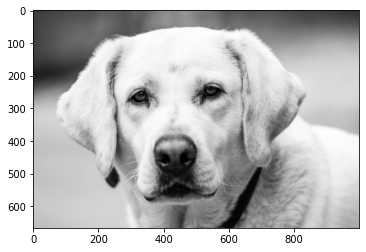

In [76]:
image = io.imread('https://images.unsplash.com/photo-1580330849490-c8061834a72d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1000&q=80', as_gray=True)*255

print("Original :", image.shape)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.show()

2D Discrete fourier transform

In [175]:
fft_complex = np.fft.fftshift(np.fft.fft2(image))
fft_amplitude = abs(fft_complex)
fft_plot = np.log(fft_amplitude)

Original : (667, 1000)


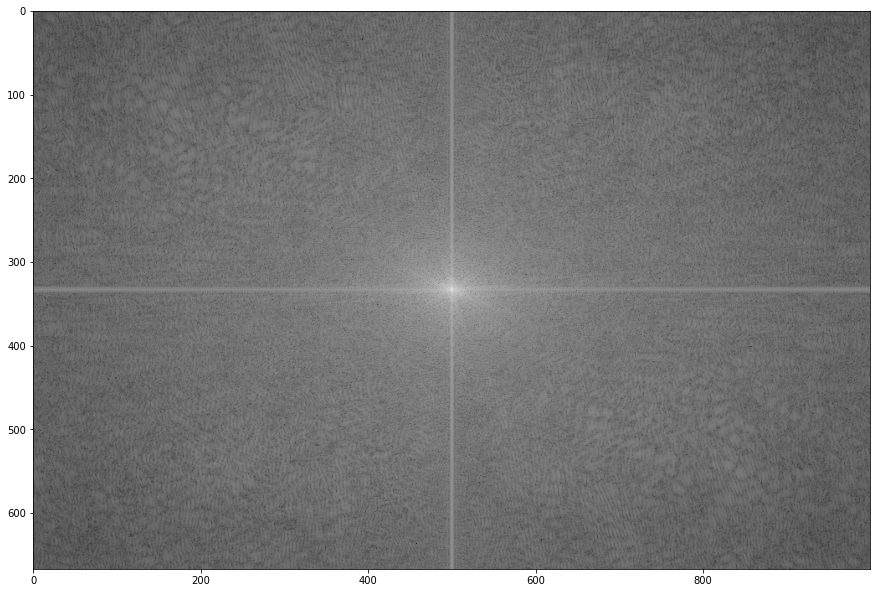

In [176]:
print("Original :", fft_plot.shape)
plt.figure(figsize=(15,15))
plt.imshow(fft_plot, cmap="gray")
plt.show()

Inverse 2D Discrete fourier transform

In [177]:
ifft_image = abs(np.fft.ifft2(fft_complex))
ifft_norm = (ifft_image - ifft_image.min())/(ifft_image.max()-ifft_image.min())*255

Original : (667, 1000)


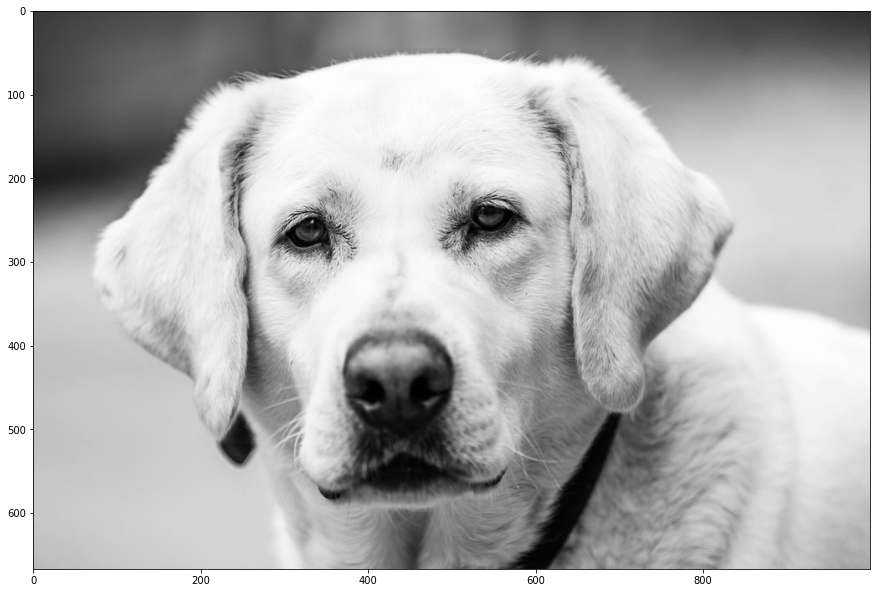

In [178]:
print("Original :", ifft_norm.shape)
plt.figure(figsize=(15,15))
plt.imshow(ifft_norm, cmap="gray")
plt.show()

2D Discrete cosine transform

In [179]:
from scipy.fftpack import dct, idct

dct_image = dct(image)
dct_plot = np.log(abs(dct_image))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Original : (667, 1000)


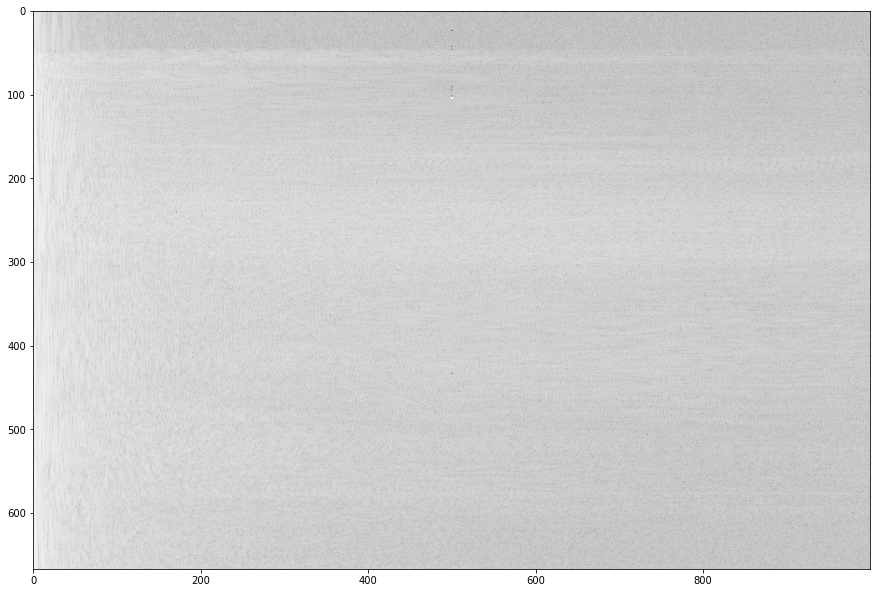

In [180]:
print("Original :", dct_plot.shape)
plt.figure(figsize=(15,15))
plt.imshow(dct_plot, cmap="gray")
plt.show()

Inverse 2D Discrete cosine transform

In [181]:
idct_image = idct(dct_image)

Original : (667, 1000)


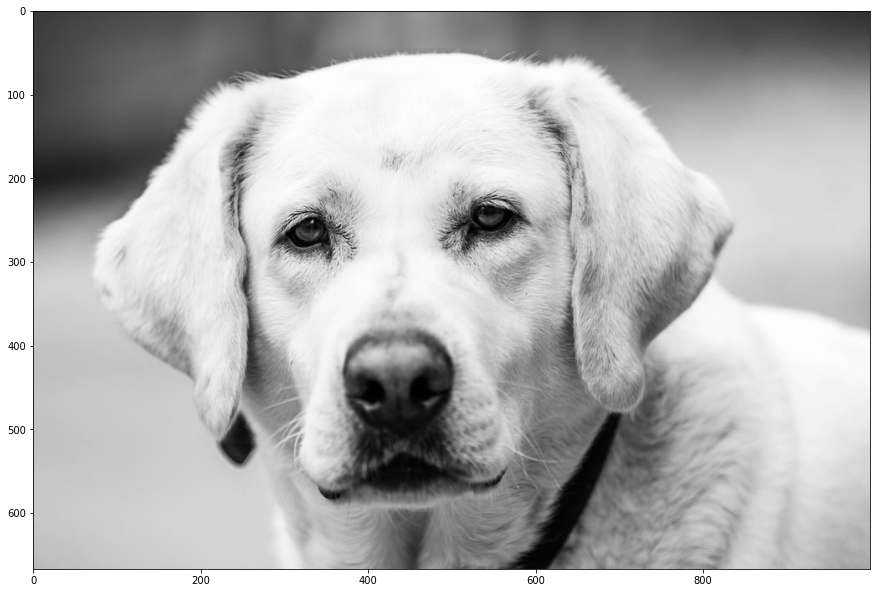

In [182]:
print("Original :", idct_image.shape)
plt.figure(figsize=(15,15))
plt.imshow(idct_image, cmap="gray")
plt.show()

# **Filtering**

In [183]:
from math import sqrt
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def lpFilter(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def hpFilter(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

In [199]:
lp_mask = lpFilter(50, image.shape)
hp_mask = hpFilter(50, image.shape)
bp_mask = hpFilter(50, image.shape) * lpFilter(100, image.shape)
names = ["Low-pass filter", "High-pass filter", "Band-pass filter"]
masks = [lp_mask, hp_mask, bp_mask]

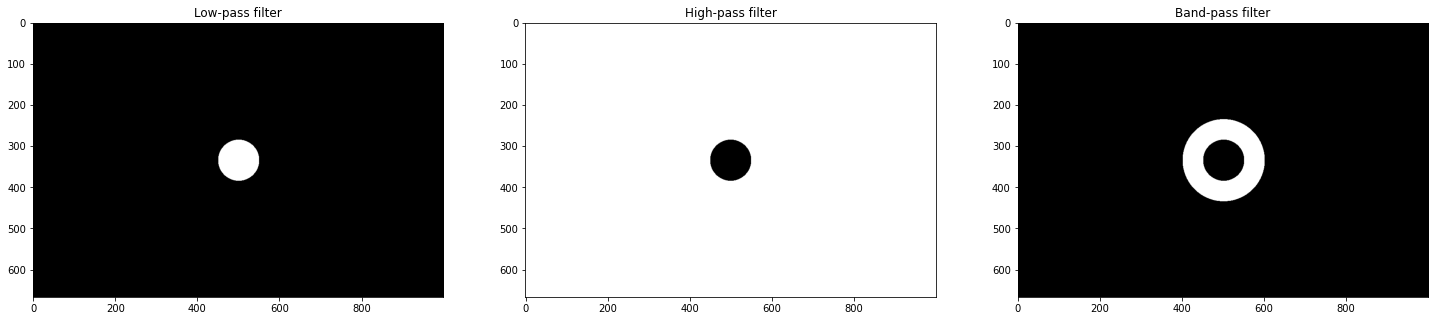

In [200]:
fig, axs = plt.subplots(1, len(names), figsize = (25, 25))

for i in range(len(masks)):
  axs[i].imshow(masks[i], cmap="gray")
  axs[i].title.set_text(names[i])

plt.show()

Low-pass filter

In [201]:
lp_fft_complex = lp_mask*fft_complex
lp_fft_plot = lp_mask*fft_plot
ifft_lp_fft = abs(np.fft.ifft2(lp_fft_complex))

names = ["Low-pass fft", "Inverse Low-pass fft"]
lp_images = [lp_fft_plot, ifft_lp_fft]

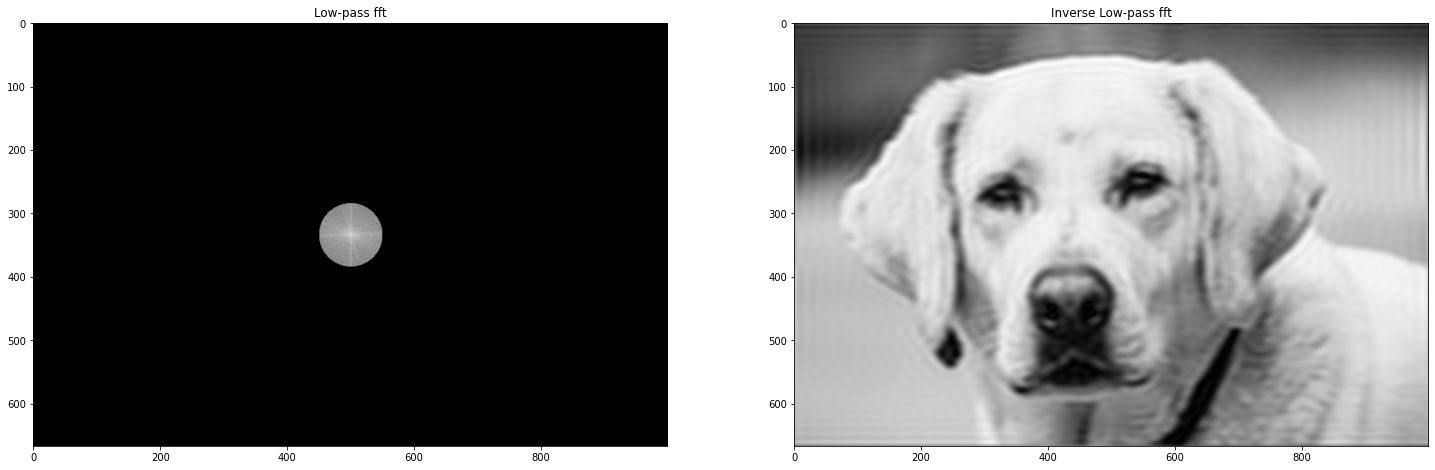

In [202]:
fig, axs = plt.subplots(1, len(names), figsize = (25, 25))

for i in range(len(lp_images)):
  axs[i].imshow(lp_images[i], cmap="gray")
  axs[i].title.set_text(names[i])

plt.show()

High-pass filter

In [203]:
hp_fft_complex = hp_mask*fft_complex
hp_fft_plot = hp_mask*fft_plot
ifft_hp_fft = abs(np.fft.ifft2(hp_fft_complex))

names = ["High-pass fft", "Inverse High-pass fft"]
hp_images = [hp_fft_plot, ifft_hp_fft]

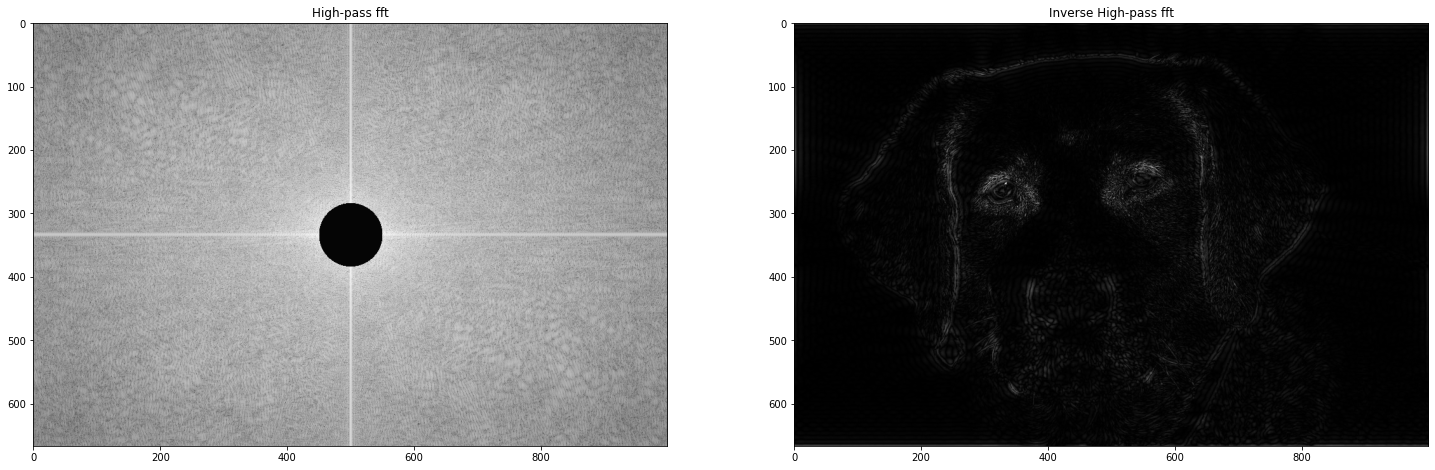

In [204]:
fig, axs = plt.subplots(1, len(names), figsize = (25, 25))

for i in range(len(hp_images)):
  axs[i].imshow(hp_images[i], cmap="gray")
  axs[i].title.set_text(names[i])

plt.show()

Band-pass filter

In [207]:
bp_fft_complex = bp_mask*fft_complex
bp_fft_plot = bp_mask*fft_plot
ifft_bp_fft = abs(np.fft.ifft2(bp_fft_complex))

names = ["Band-pass fft", "Inverse Band-pass fft"]
bp_images = [bp_fft_plot, ifft_bp_fft]

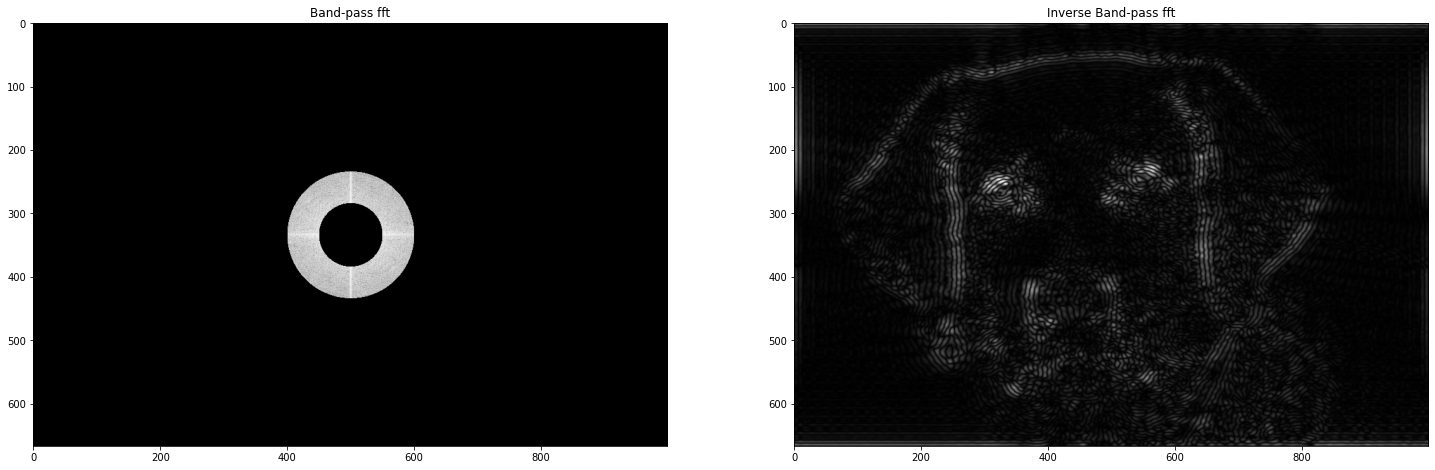

In [208]:
fig, axs = plt.subplots(1, len(names), figsize = (25, 25))

for i in range(len(bp_images)):
  axs[i].imshow(bp_images[i], cmap="gray")
  axs[i].title.set_text(names[i])

plt.show()